# Deep Learning SGP WEEK 3 Convolutional Neural Networks

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import tqdm
from socket import socket

### Our dataset is visible on the top right of the screen. We have two categories for images (covid, healthy) for both 'train' and 'validation' folders

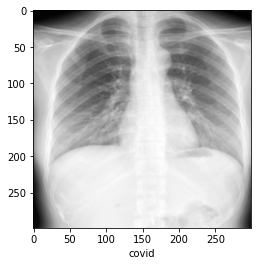

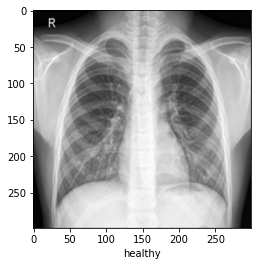

In [2]:

CATEGORIES = ['covid', 'healthy']
DATADIR = '../input/covidistesgp/CovidDataset/train'
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)   
        plt.imshow(img_arr, cmap='gray')
        plt.xlabel(category)
        plt.show()
        break

### Now we use a python library called openCV to read and perform some operations on the input data, such as GRAYSCALING and RESIZING

In [3]:
IMG_SIZE=50
train_data=[]
test_data=[]

def create_data(data_dir):
    for category in CATEGORIES:
        path=os.path.join(data_dir, category)
        class_num=CATEGORIES.index(category)
        
        for img in (os.listdir(path)):                                             ## We use os to iterate over all our files in the directory 
            try:
                img_arr=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)   ## GRAYSCALING
                img_arr=cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))                   ## RESIZING
                if(data_dir=='../input/covidistesgp/CovidDataset/train'):
                    train_data.append([img_arr,class_num])
                else:
                    test_data.append([img_arr,class_num])
            except exception as e:
                pass

In [4]:
create_data('../input/covidistesgp/CovidDataset/train')
create_data('../input/covidistesgp/CovidDataset/validation')

print(len(train_data))
print(len(test_data))

2000
200


In [5]:
for sample in train_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


### Its pretty important that we randomise our images rather than having all covid images together and all healthy images together

In [6]:
import random

random.shuffle(train_data)              ## Shuffling the dataset

for sample in train_data[:10]:
    print(sample[1])

1
1
0
1
1
1
0
1
1
1


In [7]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]

for features,label in train_data:
    x_train.append(features)
    y_train.append(label)
    
for features,label in test_data:
    x_test.append(features)
    y_test.append(label)

x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   ## reshaping the dataset to (length, 50, 50, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print(len(x_train))
print(len(x_test))

2000
200


### After we've done this preprocessing work, its handy to store our final array instead of repeating this everytime we want to use these values
### For this, we use the python library called pickle to store all the values and load them in directly later

In [8]:
import pickle

pickle_out_x_train = open("x_train.pickle","wb")          # open/create a file called x_train.pickle, and write into it         
pickle.dump(x_train, pickle_out_x_train)                  # dump the contents of the np array
pickle_out_x_train.close()                                # close the file

pickle_out_y_train = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out_y_train)
pickle_out_y_train.close()

pickle_out_x_test = open("x_test.pickle","wb")
pickle.dump(x_test, pickle_out_x_test)
pickle_out_x_test.close()

pickle_out_y_test = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out_y_test)
pickle_out_y_test.close()

print(len(x_train))
print(len(x_test))

2000
200


In [17]:
pickle_in_x_train = open("x_train.pickle","rb")           # open the file
trainX = pickle.load(pickle_in_x_train)                   # load its contents into a python varriable
pickle_in_x_train.close()                                 # close the file

pickle_in_y_train = open("y_train.pickle","rb")
trainY = pickle.load(pickle_in_y_train)
pickle_in_y_train.close()

pickle_in_x_test = open("x_test.pickle","rb")
testX = pickle.load(pickle_in_x_test)
pickle_in_x_test.close()

pickle_in_y_test = open("y_test.pickle","rb")
testY = pickle.load(pickle_in_y_test)
pickle_in_y_test.close()

print(str(len(trainX)) + ', ' + str(len(testX)))

2000, 200


Expected: 2000, 200


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

print(len(x_test))

200


### Now fill out the code in the below 2 cells following the instructions

In [19]:
### NORMALIZE the data (trainX, trainY) from 0-255 to 0-1, and convert trainX,trainY,testX,testY to np arrays
### approx. (1 x 4) lines of code
trainX = np.array(trainX)
trainY = np.array(trainY).reshape(-1, 1)
textX = np.array(testX)
testY = np.array(testY).reshape(-1, 1)
trainX = trainX / 255
testX = testX / 255
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)







(2000, 50, 50, 1)
(2000, 1)
(200, 50, 50, 1)
(200, 1)


In [29]:
model = Sequential()

### Use model.add to add layers (example: conv2D layers, then Maxpooling2D layers, Dense)
### Experiment with tf keras documentation to complete the model
### approx 5-12 lines of code, feel free to experiment with different model structures

model.add(Conv2D(filters=30, kernel_size=(5, 5), padding='valid', activation='tanh', input_shape=(50, 50, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=40, kernel_size=(5, 5), padding='valid', activation='tanh'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=50, kernel_size=(5, 5), padding='valid', activation='tanh'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 46, 46, 30)        780       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 23, 23, 30)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 19, 19, 40)        30040     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 9, 9, 40)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 5, 5, 50)          50050     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 2, 2, 50)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 200)              

In [30]:
model.fit(trainX, trainY, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
44/44 [==============================] - 1s 8ms/step - loss: 0.5394 - accuracy: 0.7428 - val_loss: 0.2649 - val_accuracy: 0.8950
Epoch 2/10
44/44 [==============================] - 0s 5ms/step - loss: 0.2373 - accuracy: 0.8931 - val_loss: 0.2462 - val_accuracy: 0.8900
Epoch 3/10
44/44 [==============================] - 0s 5ms/step - loss: 0.1918 - accuracy: 0.9162 - val_loss: 0.2341 - val_accuracy: 0.8967
Epoch 4/10
44/44 [==============================] - 0s 5ms/step - loss: 0.1895 - accuracy: 0.9259 - val_loss: 0.2161 - val_accuracy: 0.9017
Epoch 5/10
44/44 [==============================] - 0s 5ms/step - loss: 0.1568 - accuracy: 0.9343 - val_loss: 0.2023 - val_accuracy: 0.9100
Epoch 6/10
44/44 [==============================] - 0s 5ms/step - loss: 0.1395 - accuracy: 0.9437 - val_loss: 0.1981 - val_accuracy: 0.9250
Epoch 7/10
44/44 [==============================] - 0s 5ms/step - loss: 0.1180 - accuracy: 0.9569 - val_loss: 0.2562 - val_accuracy: 0.8867
Epoch 8/10
44/44 [==

In [31]:
score = model.evaluate(trainX, trainY, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

63/63 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9610
Train loss: 0.10022839158773422
Train accuracy: 0.9610000252723694


#### Expected training accuracy 90-98% 

In [32]:
score = model.evaluate(testX, testY, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.6014993786811829
Test accuracy: 0.7699999809265137


#### Expected Test Accuracy 70-80%